# Grundlagen der schließenden Statistik - Stichprobenverteilungen

In dieser Übung untersuchen wir, wie die Statistiken einer Zufallsstichprobe von Daten als Punktschätzungen für Populationsparameter dienen können. Wir sind daran interessiert, eine *Stichprobenverteilung* unserer Schätzung zu formulieren, um etwas über die Eigenschaften der Schätzung zu erfahren. Da die Schätzung eines Parameters (z.B. des Mittelwertes einer großen, aber unbekannten Grundgesamtheit) auf einem Zufallsprozess basiert (dem Ziehen einer Stichprobe), ist die Schätzung selbst auch eine zufällige Größe und besitzt deshalb auch eine Verteilung. Diese möchten wir hier untersuchen.

## Die Daten

Wir betrachten Anzeigen von Mietwohnungen deutschlandweit, die auf dem Portal [Immoscout](www.immoscout.de) zum Stichtag 01.02.2020 veröffentlicht waren. Die Sammlung repräsentiert die Grundgesamtheit, die uns interessiert. In dieser Übung möchten wir mehr über diese Mietwohnungen erfahren, indem wir kleinere Stichproben aus der Grundgesamtheit nehmen.

In [76]:
import numpy as np
import pandas as pd
import plotly.express as px

immo = pd.read_csv("Daten/immo.csv")

Werfen wir einen kurzen Blick auf die ersten Zeilen der Daten.

In [82]:
immo.head()

,Bundesland,Kreis,Ort,Kaltmiete,Wohnfläche,Gesamtmiete,PLZ,Zimmer,Baujahr
0,Bremen,Bremen,Neu_Schwachhausen,765.00,84.97,903.00,28213,3.0,1950.0
1,Schleswig_Holstein,Schleswig_Flensburg_Kreis,Struxdorf,315.20,53.43,NaN,24891,2.0,1999.0
2,Sachsen,Mittelsachsen_Kreis,Freiberg,310.00,62.00,380.00,9599,2.0,NaN
3,Bremen,Bremen,St._Magnus,452.25,60.30,584.25,28717,3.0,1959.0
4,Baden_Württemberg,Emmendingen_Kreis,Denzlingen,580.00,53.00,690.00,79211,2.0,1970.0


Wir sehen, dass der Datensatz eine Reihe von Variablen zur Lage der Wohnung enthält. In dieser Übung beschränken wir uns auf zwei der Variablen: `Wohnfläche` der Wohnung in m² und `Kaltmiete`. Um im Laufe der Übung etwas Arbeit zu sparen, erstellen wir zwei Variablen mit kurzen Namen, die diese beiden Spalten darstellen.

In [83]:
wfl = immo["Wohnfläche"]
kaltmiete = immo["Kaltmiete"]

Schauen wir uns die Verteilung der Wohnfläche in unserer Population von Mietwohnungen an, indem wir einige zusammenfassende Statistiken berechnen und ein Histogramm erstellen.

In [88]:
wfl.describe()

count    79268.000000
mean        72.519196
std         31.687423
min          0.000000
25%         53.000000
50%         66.700000
75%         86.000000
max        460.000000
Name: Wohnfläche, dtype: float64

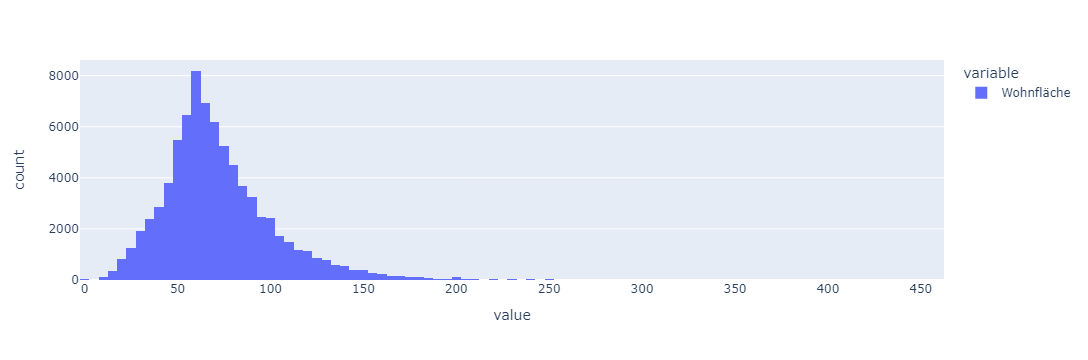

In [118]:
px.histogram(wfl, nbins=100)

### ✏️ Aufgabe 1
Beschreiben Sie die Verteilung der Grundgesamtheit

## Die unbekannte Stichprobenverteilung

In dieser Übung haben wir Zugang zu der Grundgesamtheit, aber das ist im wirklichen Leben selten der Fall. Das Sammeln von Informationen über eine gesamte Population ist oft extrem kostspielig oder unmöglich. Aus diesem Grund nehmen wir oft eine Stichprobe der Grundgesamtheit und verwenden diese, um die Eigenschaften der Grundgesamtheit zu verstehen.

Wenn wir daran interessiert wären, die durchschnittliche Wohnfläche aller Mietwohnungen anhand einer Stichprobe zu schätzen, können wir folgenden Befehl verwenden, um eine Stichprobe zu erheben.

In [100]:
samp1 = wfl.sample(50)

Mit diesem Befehl wird eine einfache Zufallsstichprobe der Größe 50 aus dem Vektor `wfl` gezogen, die dann `samp1` zugewiesen wird. Das ist so, als würde man auf der Website von Immoscout 50 zufällige Mietanzeigen aufrufen. Die Arbeit mit diesen 50 Datensätzen wäre wesentlich einfacher als die Arbeit mit allen 79268 Anzeigen.

### ✏️ Aufgabe 2
Beschreiben Sie die Verteilung dieser Stichprobe. Wie ist sie im Vergleich zur Verteilung der Grundgesamtheit?

Wenn wir daran interessiert sind, die durchschnittliche Wohnfläche einer Mietwohnung anhand der Stichprobe zu schätzen, ist unsere beste Schätzung der Stichprobenmittelwert.

In [101]:
samp1.mean()

69.8794

Je nachdem, welche 50 Wohnungen Sie ausgewählt haben, könnte Ihre Schätzung etwas über oder etwas unter dem tatsächlichen Durchschnitt der Grundgesamtheit von 72.52 m² liegen. Im Allgemeinen erweist sich der Stichprobenmittelwert jedoch als ziemlich gute Schätzung der durchschnittlichen Wohnfläche, und wir konnten ihn mit einer Stichprobe von weniger als 0.1 % der Grundgesamtheit ermitteln.

### ✏️ Aufgabe 3
Nehmen Sie eine zweite Stichprobe, ebenfalls mit einem Umfang von 50, und nennen Sie sie `samp2`. Wie verhält sich der Mittelwert von `samp2` im Vergleich zum Mittelwert von `samp1`? Angenommen, wir nehmen zwei weitere Stichproben, eine mit dem Umfang 100 und eine mit dem Umfang 1000. Welche würde Ihrer Meinung nach eine genauere Schätzung des Mittelwerts der Grundgesamtheit liefern?

Wenig überraschend erhalten wir jedes Mal, wenn wir eine weitere Stichprobe nehmen, einen anderen Stichprobenmittelwert. Es ist nützlich, ein Gefühl dafür zu bekommen, wie viel Variabilität wir erwarten sollten, wenn wir den Mittelwert der Grundgesamtheit auf diese Weise schätzen. Die Verteilung der Stichprobenmittelwerte, die so genannte *Stichprobenverteilung*, kann uns helfen, diese Variabilität zu verstehen. Da wir in dieser Übung Zugang zur Grundgesamtheit haben, können wir die Stichprobenverteilung für den Stichprobenmittelwert erstellen, indem wir die oben genannten Schritte viele Male wiederholen. Hier erzeugen wir 5000 Stichproben und berechnen den Mittelwert jeder einzelnen Stichproben.

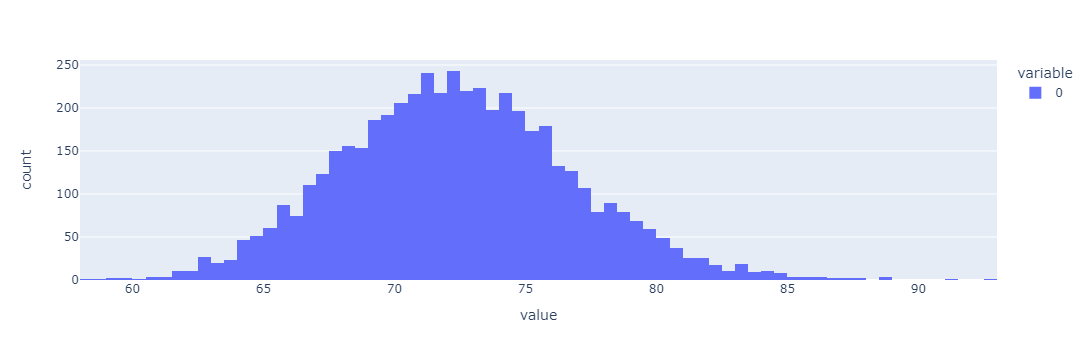

In [104]:
sample_means50 = [wfl.sample(50).mean() for i in range(0, 5000)]

px.histogram(sample_means50)

Mit dem Argument `nbins` kann man das Erscheinungsbild des Histogrammes steuern 

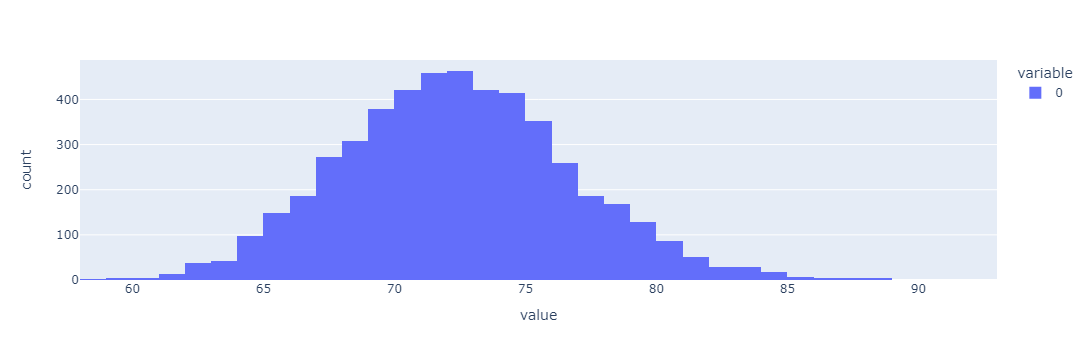

In [107]:
px.histogram(sample_means50, nbins=40)

Hier verwenden wir Python, um 5000 Stichproben der Größe 50 aus der Grundgesamtheit zu ziehen, den Mittelwert jeder Stichprobe zu berechnen und jedes Ergebnis in einer Variablen namens `sample_means50` zu speichern. Als Nächstes werden wir uns ansehen, wie dieser Code funktioniert.

### ✏️ Aufgabe 4
Wie viele Elemente sind in `sample_means50` enthalten? Beschreiben Sie die Stichprobenverteilung, insbesondere ihren Mittelpunkt. Würden Sie erwarten, dass sich die Verteilung ändern würde, wenn wir stattdessen 50.000 Stichprobenmittelwerte sammeln würden?

### ✏️ Aufgabe 5
Initialisieren Sie einen Vektor mit 100 Nullen namens `sample_means_small` (Hinweis: `np.zeros`). Führen Sie eine Schleife aus, die eine Stichprobe der Größe 50 aus `wfl` nimmt und den Stichprobenmittelwert in `sample_means_small` speichert. Die Schleife soll von 0 bis 99 iterieren. Geben Sie `sample_means_small` aus. Wie viele Elemente befinden sich in diesem Objekt? Was stellt jedes Element dar?

## Stichprobenumfang und Stichprobenverteilung

Die von uns berechnete Stichprobenverteilung sagt viel über die Schätzung der durchschnittlichen Wohnfläche der im Februar 2020 angebotenen Mietwohnungen in Deutschland aus. Da der Stichprobenmittelwert ein unverzerrter Schätzer ist, ist die Stichprobenverteilung auf die tatsächliche durchschnittliche Wohnfläche der Grundgesamtheit zentriert, und die Streuung der Verteilung zeigt an, wie viel Variabilität durch die Stichprobe von nur 50 Mietwohnungen verursacht wird.

Um ein Gefühl dafür zu bekommen, wie sich der Stichprobenumfang auf unsere Verteilung auswirkt, lassen Sie uns zwei weitere Stichprobenverteilungen erstellen: eine auf der Grundlage eines Stichprobenumfangs von 10 und eine weitere auf der Grundlage eines Stichprobenumfangs von 100.

In [108]:
sample_means10 = [wfl.sample(10).mean() for i in range(0, 5000)]
sample_means100 = [wfl.sample(100).mean() for i in range(0, 5000)]

Um zu sehen, wie sich unterschiedliche Stichprobengrößen auf die Stichprobenverteilung auswirken, legen Sie die drei Verteilungen übereinander. Wir benutzen dazu plotly's faceting Funktionalität: Zunächst speichern wir 3x5000 gezogenen Stichprobenmittelwerte in einem DataFrame und speichern zu jedem in der Spalte `N` die Stichprobengröße (also 10, 50 oder 100). Diese Spalte übergeben wir plotly im Argument `facet_row`, so dass für jede der drei Ausprägungen ein Graph (in einer Zeile) erzeugt wird. Im Plotly Befehl, ändern Sie ggf. die Argumente `width`, `height` und `nbins` um eine bessere Darstellung zu erhalten.  

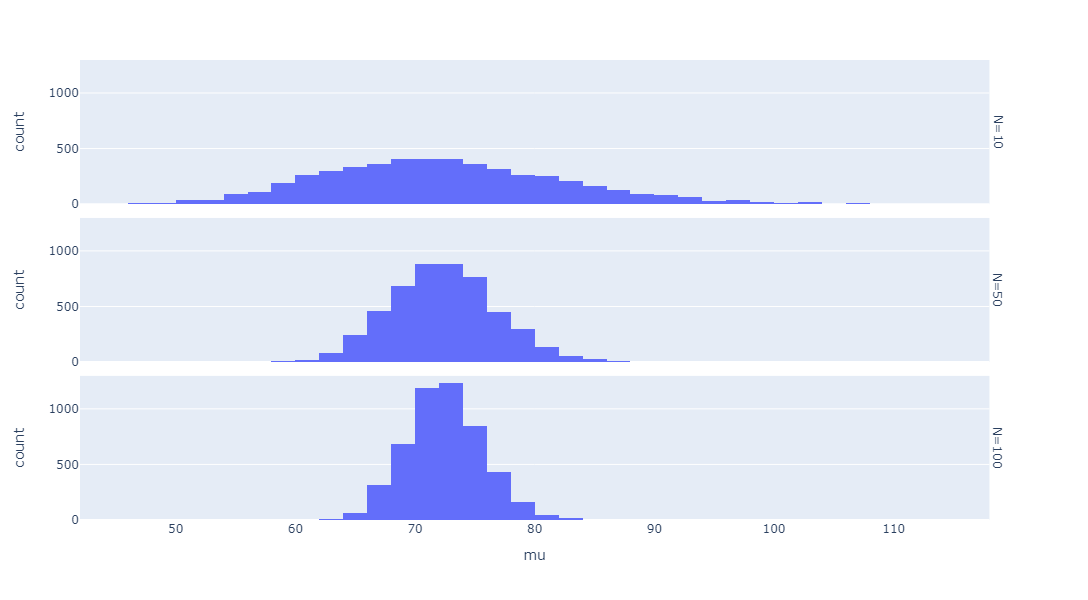

In [122]:
sample_means = pd.DataFrame({"mu": sample_means10 + sample_means50 + sample_means100, "N": 5000*[10] + 5000*[50] + 5000*[100]})
px.histogram(sample_means, x="mu", facet_row="N", nbins=60, width=600, height=600)

### ✏️ Aufgabe 6
Was passiert mit dem Zentrum, wenn der Stichprobenumfang größer ist? Was ist mit der Streuung?

---
### ✏️ Aufgabe 7

Bislang haben wir uns nur auf die Schätzung der durchschnittlichen Wohnfläche von Mietwohnungen konzentriert. Jetzt werden Sie versuchen, die durchschnittliche Kaltmiete der Wohnungen zu schätzen.
- Ziehen Sie eine Zufallsstichprobe mit einem Umfang von 50 aus `Kaltmiete`. Wie lautet Ihre beste Punktschätzung des Mittelwerts der Grundgesamtheit auf der Grundlage dieser Stichprobe?
- Da Sie Zugriff auf die Grundgesamtheit haben, simulieren Sie die Stichprobenverteilung für die durchschnittliche Kaltmiete einer im Februar 2020 angebotenen Mietwohnung in Deutschland, indem Sie 5000 Stichproben aus der Grundgesamtheit mit dem Umfang 50 ziehen und 5000 Stichprobenmittelwerte berechnen. Speichern Sie diese Mittelwerte in einem Vektor mit dem Namen `sample_means50`. Zeichnen Sie die Daten auf und beschreiben Sie dann die Form dieser Stichprobenverteilung. Wie hoch schätzen Sie auf der Grundlage dieser Stichprobenverteilung die mittlere Kaltmiete der Grundgesamtheit ein? Berechnen Sie schließlich den Mittelwert der Grundgesamtheit und geben Sie ihn an.
- Ändern Sie den Stichprobenumfang von 50 auf 150, berechnen Sie dann die Stichprobenverteilung mit derselben Methode wie oben und speichern Sie diese Mittelwerte in einem neuen Vektor mit der Bezeichnung `Stichprobenmittelwert150`. Beschreiben Sie die Form dieser Stichprobenverteilung, und vergleichen Sie sie mit der Stichprobenverteilung für einen Stichprobenumfang von 50. Wie hoch schätzen Sie auf der Grundlage dieser Stichprobenverteilung die mittlere Kaltmiete der Grundgesamtheit?
- Welche der Stichprobenverteilungen aus 2 und 3 hat eine geringere Streuung? Wenn es uns darum geht, Schätzungen vorzunehmen, die häufiger nahe am wahren Wert liegen, würden wir dann eine Verteilung mit einer großen oder kleinen Streuung bevorzugen?

---

Diese Übung ist eine deutsche Übersetzung der Übungen aus OpenIntro Statistics von Andrew Bray und Mine Çetinkaya-Rundel (https://www.openintro.org/book/os/). Die Python Adaption wurde teilweise von David Akman und Imran Ture (www.featureranking.com) übernommen.